<a href="https://colab.research.google.com/github/Dennis-fast-ai/full_MNIST/blob/main/mnist_all_numbers_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 17.5MB/s 
     |████████████████████████████████| 194kB 56.5MB/s 
     |████████████████████████████████| 1.2MB 49.3MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastai.vision.all import *
from fastbook import *
from fastai.vision.widgets import *

matplotlib.rc('image', cmap='Greys')

In [3]:
path = untar_data(URLs.MNIST)

In [4]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2)
dls.valid_ds.items[:6]

[Path('/root/.fastai/data/mnist_png/training/1/44935.png'),
 Path('/root/.fastai/data/mnist_png/testing/3/5638.png'),
 Path('/root/.fastai/data/mnist_png/training/4/10758.png'),
 Path('/root/.fastai/data/mnist_png/training/2/11339.png'),
 Path('/root/.fastai/data/mnist_png/training/4/6729.png'),
 Path('/root/.fastai/data/mnist_png/training/6/38659.png')]

In [5]:
fnames = get_image_files(path)
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames, label_func)

In [6]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [7]:
training = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [8]:
dls = training.dataloaders(path)

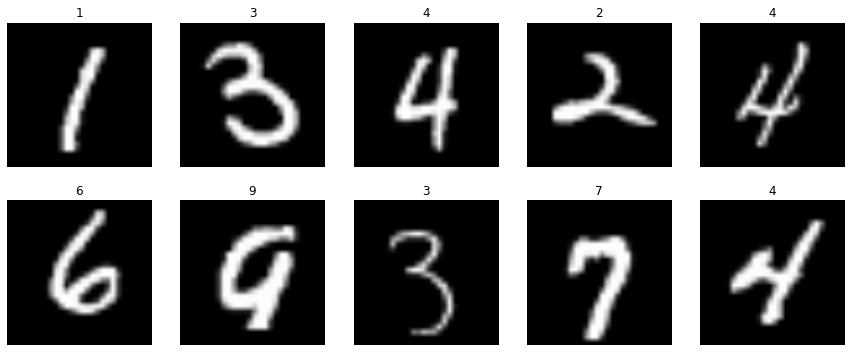

In [9]:
dls.valid.show_batch(max_n=10, nrows=2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


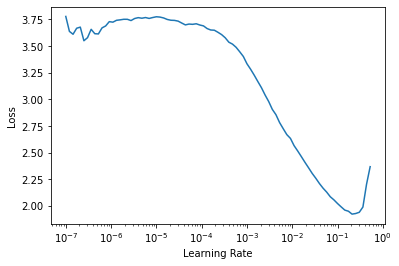

In [10]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()

In [11]:
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.107781,0.069549,0.018000,02:11
1,0.103565,0.073040,0.017143,02:12
2,0.096335,0.048902,0.012500,02:12
3,0.045487,0.110185,0.027071,02:12
4,0.038126,0.036691,0.009786,02:13
5,0.028041,0.028054,0.006643,02:13
6,0.020439,0.025867,0.006071,02:13
7,0.013564,0.019636,0.005857,02:12
8,0.005637,0.018042,0.004857,02:13
9,0.009040,0.018133,0.005071,02:13


In [13]:
learn.export("export_MNIST")